# LIBRERIAS

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# DESARROLLO PCA

Tamaño del set original: (7432, 28, 28)
Tamaño del set original aplanado: (7432, 784)
Tamaño del target original: (7432,)
Tamaño del target original aplanado: (7432, 1)
Tamaño del set con 90 % menos de variables características: (7432, 261)


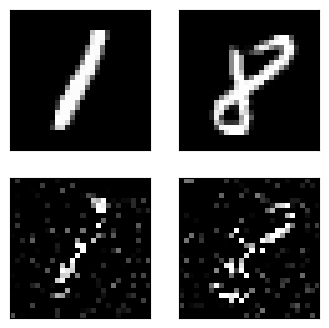

(7432, 784)
(7432, 1)
[0.19893329 0.11435268]


(7432, 261)
(7432, 1)
[0.15292716 0.08687524]


In [6]:
# CARGA DEL SET DE DATOS MNIST------------------------------------------------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.concatenate((x_train, x_test))
y_train = np.concatenate((y_train, y_test))


# ELIMINACIÓN DEL 50% DE LOS DATOS DEL SET ORIGINAL-------------------------------------------
# Calcular el número de filas a mantener
num_rows_keep = int(0.5 * x_train.shape[0])  # Mantener el 50% de las filas
# Seleccionar aleatoriamente las filas a mantener
selected_rows = np.random.choice(x_train.shape[0], num_rows_keep, replace=False)
# Filtrar x_train e y_train para mantener solo las filas seleccionadas
x_train = x_train[selected_rows]
y_train = y_train[selected_rows]


# EXTRACCIÓN DE LOS NÚMEROS 1 Y 8 DEL SET------------------------------------------------------------
# Encontrar índices de las imágenes correspondientes a los números 1 y 8
indices_1 = np.where(y_train == 1)[0]
indices_8 = np.where(y_train == 8)[0]
# Concatenar los índices de ambos números
selected_indices = np.concatenate((indices_1, indices_8))
# Extraer solo las imágenes correspondientes a los números 1 y 8
x_train = x_train[selected_indices]
y_train = y_train[selected_indices]


# NORMALIZACIÓN--------------------------------------------------------------------------
# Normalizar las imágenes
x_train = x_train / 255.0


# APLANAMIENTO UNIDIMENSIONAL----------------------------------------------------------
# Aplanamiento de x_train
print(f"Tamaño del set original: {x_train.shape}")
x_train = x_train.reshape(x_train.shape[0], -1)
print(f"Tamaño del set original aplanado: {x_train.shape}")
# Aplanamiento de y_train
print(f"Tamaño del target original: {y_train.shape}")
y_train = y_train.reshape(y_train.shape[0], -1)
print(f"Tamaño del target original aplanado: {y_train.shape}")

# ELIMINACIÓN DEL 90% DE LAS VARIABLES CARACTERÍSTICAS DE LA IMAGEN----------------------------
# Definir la cantidad de variables a mantener (10 %)
n_features_keep = x_train.shape[1] // 3                                               #PARÁMETRO
# Seleccionar aleatoriamente las variables a mantener
selected_features = np.random.choice(x_train.shape[1], n_features_keep, replace=False)
# Mantener solo las variables seleccionadas en x_train
x_train_reduced = x_train[:, selected_features]
# Añadir ruido a la imagen
def noisy_data(x):
    x_noisy = x + 0.2 * np.random.normal(loc=0.0, scale=1.0, size=x.shape)          #PARÁMETRO
    x_noisy = np.clip(x_noisy, 0.0, 1.0)
    return x_noisy
x_train_reduced = noisy_data(x_train_reduced)
# Reconstruir las imágenes utilizando solo el 50 % de las variables
x_train_reconstructed = np.zeros_like(x_train)
x_train_reconstructed[:, selected_features] = x_train_reduced
print(f"Tamaño del set con 90 % menos de variables características: {x_train_reduced.shape}")


# GRÁFICO DE IMÁGENES DAÑADAS E IMÁGENES ORIGINALES ------------------------------------
# Obtener índices de las imágenes del número 1 y número 8
indices_number_1 = np.where(y_train == 1)[0]
indices_number_8 = np.where(y_train == 8)[0]
# Seleccionar las primeras 5 imágenes del número 1 y número 8
indices_to_display_1 = indices_number_1[:1]  # Aquí puedes ajustar el número de imágenes a mostrar
indices_to_display_8 = indices_number_8[:1]  # Aquí puedes ajustar el número de imágenes a mostrar
# Concatenar los índices seleccionados
indices_to_display = np.concatenate((indices_to_display_1, indices_to_display_8))
# Graficar las imágenes y sus reconstrucciones
n = len(indices_to_display)  # Número de imágenes para mostrar
plt.figure(figsize=(4, 4))
for i, idx in enumerate(indices_to_display):
    # Mostrar imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Mostrar imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_reconstructed[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# GRÁFICO DE DISPERSIÓN DE DATOS NO DAÑADOS----------------------------------------------------------
# Crear un DataFrame a partir de los datos transformados
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# Imprimir las primeras filas del DataFrame
print(x_train.shape)
print(y_train.shape)
# Convertir los datos en y_train a tipo str, y designamos nombre.
y_train = y_train.rename(columns={0: 'target'})
y_train['target'] = y_train['target'].astype(str)
# Creamos los componentes principales (CP)
pca = PCA(n_components=2)
CP = pd.DataFrame(pca.fit_transform(x_train), columns=['PC1', 'PC2'])
# Entre los CP, capturan el % de los datos.
print(pca.explained_variance_ratio_)
# Incorporamos la columna target al DataFrame de CP
CP['target'] = y_train['target']
# Graficamos
fig = px.scatter(CP, x="PC1", y="PC2", color="target")
fig.show()


# GRÁFICO DE DISPERSIÓN DE DATOS DAÑADOS-----------------------------------------------------
# Creamos una copia
x_train_reconstructed = x_train_reduced.copy()
# Crear un DataFrame a partir de los datos transformados
x_train = pd.DataFrame(x_train_reconstructed)
y_train = pd.DataFrame(y_train)
# Imprimir las primeras filas del DataFrame
print(x_train_reconstructed.shape)
print(y_train.shape)
# Convertir los datos en y_train a tipo str, y designamos nombre.
y_train = y_train.rename(columns={0: 'target'})
y_train['target'] = y_train['target'].astype(str)
# Creamos los componentes principales (CP)
pca = PCA(n_components=2)
CP_DAMAGED = pd.DataFrame(pca.fit_transform(x_train_reconstructed), columns=['PC1', 'PC2'])
# Entre los CP, capturan el % de los datos.
print(pca.explained_variance_ratio_)
# Incorporamos la columna target al DataFrame de CP_DAMAGED
CP_DAMAGED['target'] = y_train['target']
# Graficamos
fig = px.scatter(CP_DAMAGED, x="PC1", y="PC2", color="target")
fig.show()


# INGENIERIA DE DATOS PARA PRESENTACION

In [ ]:
CP.shape

(7385, 3)

In [ ]:
# SEPARAMOS CP EN  CP1 Y CP8
CP8 = CP[CP["target"] == "8"].copy()
CP1 = CP[CP["target"] == "1"].copy()

In [ ]:
# fUNCION PARA RETIRAR RUIDO
def eliminar_datos_extremos(dataframe, num_outliers=50):
    df_copy = dataframe.copy()  # Copiar el DataFrame para no modificar el original
    # Calcular el centroide de la columna "PC1"
    centroid = df_copy["PC1"].mean()
    # Calcular la distancia de cada valor de "PC1" al centroide
    distances = abs(df_copy["PC1"] - centroid)
    # Ordenar los valores de "PC1" por su distancia al centroide (de forma ascendente)
    sorted_values = df_copy["PC1"].sort_values()
    # Eliminar los 50 valores más lejanos (más negativos) de la columna "PC1"
    df_copy = df_copy[~df_copy["PC1"].isin(sorted_values[:num_outliers])]
    return df_copy
# Aplicamos funcion
CP8 = eliminar_datos_extremos(CP8)

In [ ]:
CP8.shape

(3255, 3)

In [ ]:
CP1.shape

(3980, 3)

In [ ]:
# Unir los DataFrames CP7 y CP1 en un nuevo DataFrame CP
CP = pd.concat([CP8, CP1], ignore_index=True)

In [ ]:
CP.head()

,PC1,PC2,target
0,2.564270,-0.682750,8
1,0.208110,0.138147,8
2,0.981138,-0.125909,8
3,0.704633,-0.376149,8
4,4.003596,-1.051965,8


In [ ]:
fig = px.scatter(CP, x="PC1",y="PC2", color="target")
fig.show()

In [ ]:
# Agregar la nueva columna 'tiempo' con valores 1 y 2
CP_DAÑADO['tiempo'] = 1
CP['tiempo'] = 2

In [ ]:
# Conteo con el objetivo de designarles un nombre.
CP_DAÑADO['conteo'] = CP_DAÑADO.index + 1
CP['conteo'] =CP.index + 1

In [ ]:
CP.head()

,PC1,PC2,target,conteo,tiempo
0,2.564270,-0.682750,8,1,2
1,0.208110,0.138147,8,2,2
2,0.981138,-0.125909,8,3,2
3,0.704633,-0.376149,8,4,2
4,4.003596,-1.051965,8,5,2


In [ ]:
CP_DAÑADO.shape

(7385, 5)

In [ ]:
# Unir los DataFrames CP7 y CP1 en un nuevo DataFrame CP
df = pd.concat([CP_DAÑADO, CP])

In [ ]:
df.shape

(14620, 5)

In [ ]:
# Guardar como CSV
df.to_csv('mi_dataframe.csv', index=False)

In [ ]:
df.to_excel('nombre_archivo.xlsx', index=False)